In [1]:
import pandas as pd
df=pd.read_csv(r"/kaggle/input/creditcardfraud/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df["Time"] = (df["Time"] % 86400) // 3600

In [3]:
df.head(145000)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,0.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,0.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,0.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144995,0.0,1.867789,1.096343,-2.302556,3.787999,1.886356,0.598666,0.442352,0.046223,-1.438116,...,-0.407005,-1.192546,0.118505,-0.638239,-0.031923,-0.292862,-0.009513,0.015809,44.92,0
144996,0.0,1.917032,-0.244223,-0.083598,0.638823,-0.839918,-0.301989,-0.998365,0.113551,1.549470,...,0.205181,0.832267,0.249868,1.075328,-0.358770,-0.330838,0.089815,0.017343,8.49,0
144997,0.0,2.079045,0.102572,-2.001729,-0.038502,0.488629,-1.472151,0.712130,-0.466249,-0.090184,...,0.211993,0.746211,-0.037347,0.082145,0.389109,0.220428,-0.084926,-0.088664,1.47,0
144998,0.0,0.112838,1.672349,0.704650,3.951289,1.554289,1.622200,0.740988,0.173311,-2.575463,...,-0.184359,-0.469008,-0.101157,-0.313111,-0.581436,0.071696,0.193757,0.178118,2.68,0


In [4]:
# Split features and target
X = df.drop('Class', axis=1)
y = df['Class']

In [6]:
from sklearn.model_selection import train_test_split
# Split into train/test sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

In [7]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, fbeta_score, make_scorer

In [8]:
# Create Decision Tree classifier with balanced class weights
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)

# Custom scorer focusing on recall with precision constraint (F2-score)
f2_scorer = make_scorer(fbeta_score, beta=2)

# Hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy'],
}

# Grid search with cross-validation
grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring=f2_scorer,  # Prioritizes recall while considering precision
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# Best model from grid search
best_dt = grid_search.best_estimator_

# Evaluate on test set
y_pred = best_dt.predict(X_test)

# Metrics
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Key metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f2 = fbeta_score(y_test, y_pred, beta=2)

print(f"\nPrecision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F2-score: {f2:.4f}")

# Feature importances
importances = best_dt.feature_importances_
feature_names = X.columns
feature_imp = pd.DataFrame(sorted(zip(importances, feature_names), reverse=True), 
                           columns=['Value','Feature'])

print("\nFeature Importances:")
print(feature_imp)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.75      0.70      0.72       148

    accuracy                           1.00     85443
   macro avg       0.87      0.85      0.86     85443
weighted avg       1.00      1.00      1.00     85443


Confusion Matrix:
[[85260    35]
 [   45   103]]

Precision: 0.7464
Recall: 0.6959
F2-score: 0.7055

Feature Importances:
       Value Feature
0   0.678222     V14
1   0.080867      V4
2   0.055540     V12
3   0.022052     V18
4   0.016570     V13
5   0.015804     V28
6   0.014296     V26
7   0.013503  Amount
8   0.013023      V8
9   0.010624      V1
10  0.008359     V15
11  0.008334     V25
12  0.007653     V23
13  0.006502     V24
14  0.005944     V10
15  0.005333     V1

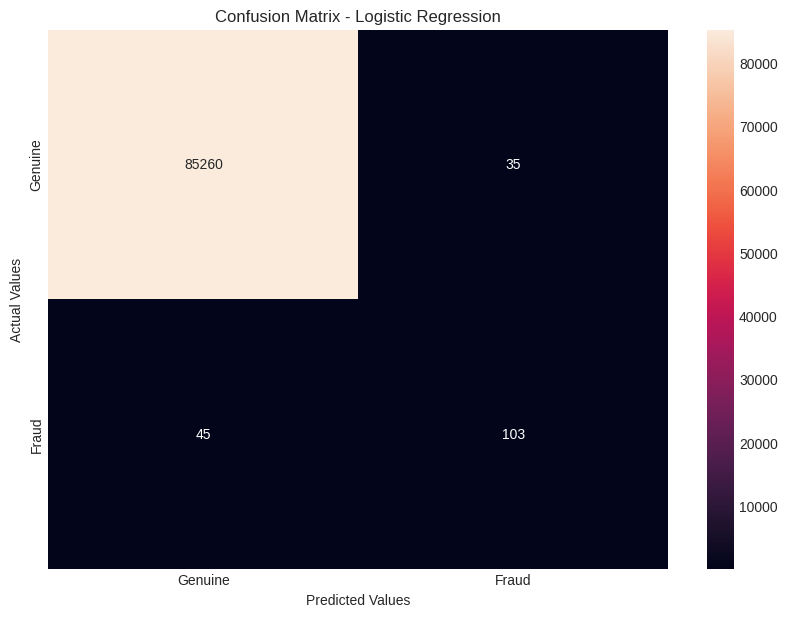

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score


confusion_matrix_rf = confusion_matrix(y_test, y_pred)
# Visualization
plt.figure(figsize=(10,7))
ax = plt.subplot()
sns.heatmap(confusion_matrix_rf, annot=True, fmt='g', ax = ax)
ax.set_xlabel('Predicted Values')
ax.set_ylabel('Actual Values')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(['Genuine','Fraud'])
ax.yaxis.set_ticklabels(['Genuine','Fraud'])
plt.show()

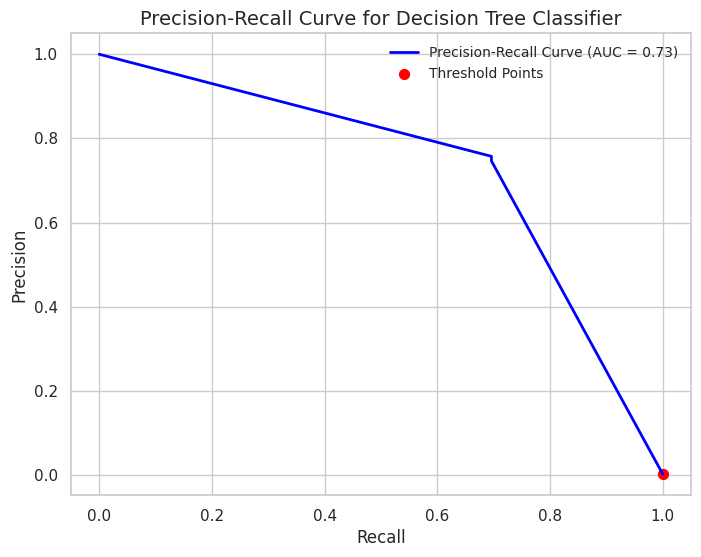

Area Under the Precision-Recall Curve (AUC-PR): 0.73


In [11]:
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for the positive class
y_scores = best_dt.predict_proba(X_test)[:, 1]

# Compute precision, recall, and thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Calculate the area under the Precision-Recall curve (AUC-PR)
auc_pr = auc(recall, precision)

# Plot the Precision-Recall curve using matplotlib and seaborn
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")  # Use seaborn style for better aesthetics
plt.plot(recall, precision, color='blue', lw=2, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.scatter(recall[::15], precision[::15], color='red', s=50, label='Threshold Points')  # Highlight threshold points
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve for Decision Tree Classifier', fontsize=14)
plt.legend(fontsize=10)
plt.grid(True)
plt.show()

# Print AUC-PR value
print(f"Area Under the Precision-Recall Curve (AUC-PR): {auc_pr:.2f}")

<ipython-input-13-c4249ecd37ad>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


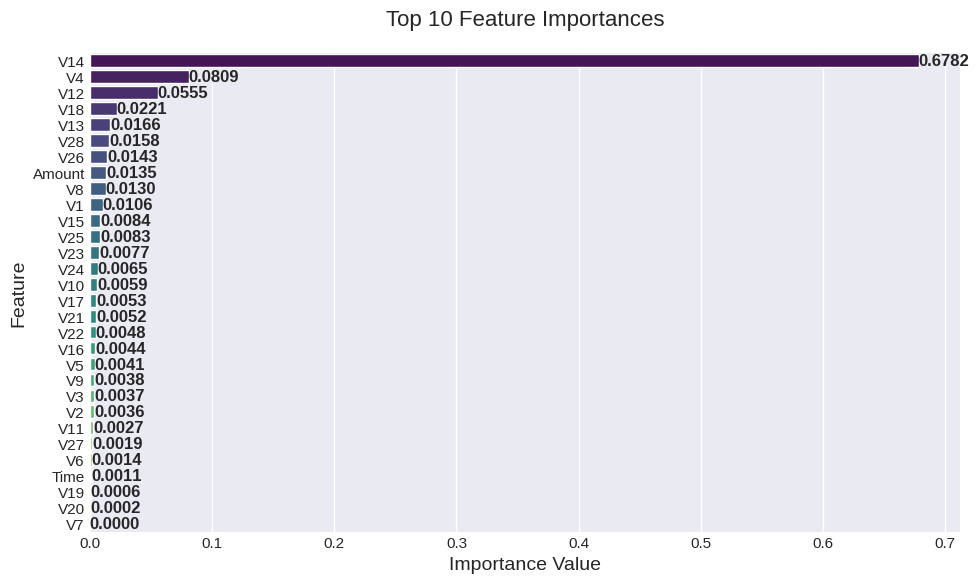

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plot
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)

# Get the top 10 features by importance
top_features = feature_imp.head(30)

# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Value', y='Feature', data=top_features, palette='viridis')

# Add titles and labels
plt.title('Top 10 Feature Importances', fontsize=16, pad=20)
plt.xlabel('Importance Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)

# Add value annotations on the bars
for index, value in enumerate(top_features['Value']):
    plt.text(value, index, f'{value:.4f}', va='center', fontsize=12, fontweight='bold')

# Show the plot
plt.tight_layout()
plt.show()

In [14]:
import pickle

# Save the model to a file
model_filename = 'decision_tree_fraud_detection_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_dt, file)
